<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork820-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

# ***Machine Learning Foundation***

## ***Boosting and Stacking LAB***

## ***Objectives***

After completing this demo you will be able to:

*   Understand how Gradient Boosting helps reduce error.

*   Identify the benefits of using AdaBoost.

*   Interpret the benefits of stacking models and comparing their results to boosted models.

$ \ $

-----

## ***Introduction***

$ \ $


We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML241ENSkillsNetwork31576874-2022-01-01) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

For each record in the dataset it is provided:

*   Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration.

*   Triaxial angular velocity from the gyroscope.

*   A 561-feature vector with time and frequency domain variables.

*   Its activity label.

More information about the features is available on the website shown above.




$ \ $

----

## ***Import libraries***

Let's first import required libraries.

In [1]:
import seaborn as sns, pandas as pd, numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

In [2]:
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning) 
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning) 
warnings.filterwarnings("ignore", category = FutureWarning)

$ \ $

---

## ***Question $(1)$***

$ \ $

$(1)$  Import the data from the file `Human_Activity_Recognition_Using_Smartphones_Data.csv`.

In [3]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')

$ \ $ 

$(2)$ Examine the shape and data types. 

In [4]:
data.shape

(10299, 562)

In [5]:
data.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object

In [6]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

$ \ $

$(3)$ Determine if the float columns need to be scaled.


In [7]:
# creamos una lista vacia donde guardaremos los rasgos numericos
dictionary = (data.dtypes == np.float)
float_columns = []

# guardamos los datos numericos como dijimos anteriormente
for x in dictionary.keys():
  if dictionary[x] == True:
    float_columns.append(x)

In [8]:
# Verificamos que el máximo de todas las columnas flotantes sea 1.0
print((data[float_columns].max() == 1.0).all() )

# Verificamos que el mínimo de todas las columnas flotantes sea -1.0
print((data[float_columns].min() == -1.0).all())

True
True


$ \ $

---

## ***Question $(2)$***

$ \ $

$(1)$  Integer encode the activities.


In [9]:
data['Activity'].head()

0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
Name: Activity, dtype: object

In [10]:
data['Activity'].value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

In [11]:
# creamos un objeto de tipo codificador de etiquetas
label = LabelEncoder()

# X ----> T(X) y cambiamos X por T(X)
data['Activity'] = label.fit_transform(data['Activity'])
data['Activity']

0        2
1        2
2        2
3        2
4        2
        ..
10294    5
10295    5
10296    5
10297    5
10298    5
Name: Activity, Length: 10299, dtype: int64

$ \ $

$(2)$  Split the data into train and test data sets. 

In [12]:
# describimos las columnas del dataframe
columnas = data.columns

# tomamos todas las columnas excepto 'Activity'
feature_columns = [x for x in columnas if x != 'Activity']

# describimos los datos predictivos y la data objetivo
X = data[feature_columns]
y = data['Activity'] 

In [13]:
# separamos nuestra data en data de entrenamiento (70%) y data de prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

$ \ $

---

## ***Question $(3)$***

$ \ $

$(1)$ Fit gradient boosted tree (árbol potenciado por gradiente) models with all parameters set to their defaults with the following tree numbers (`n_estimators = [15, 25, 50, 100, 200, 400]`) and evaluate the accuracy on the test data for each of these models.

In [14]:
# creamos una lista vacia, la cual llenaremos en este paso
error_list = []

# describimos la lista del numero de arboles 
tree_list = [15, 25, 50, 100, 200, 400]

# realizamos una iteracion sobre la lista anterior que describe el numero de arboles
for n_trees in tree_list:
    
    # Inicializamos el clasificador de aumento de gradiente
    GBC = GradientBoostingClassifier(n_estimators = n_trees, random_state= 42)

    # mostramos en pantalla el numero de arboles que se estan tomando
    print(f'Fitting model with {n_trees} trees')

    # entrenamos el modelo con la data de entrenamiento
    GBC.fit(X_train.values, y_train.values)

    # predecimos un conjunto de valores con la data de prueba
    y_pred = GBC.predict(X_test)

    # describimos el error de la data de prueba, respecto a la data predecida
    error = 1.0 - accuracy_score(y_test, y_pred)
    
    # creamos una serie que representa el numero de arboles y el error correspondiente
    serie = pd.Series({'n_trees': n_trees, 'error': error})
    
    # pegamos la serie en la lista vacia
    error_list.append(serie)

# concatenamos las series, tomamos transpuesta y luego establecemos los indices como el numero de arboles
error_df = pd.concat(error_list, axis = 1).T.set_index('n_trees')

# mostramos el dataframe construido en pantalla
error_df

Fitting model with 15 trees
Fitting model with 25 trees
Fitting model with 50 trees
Fitting model with 100 trees
Fitting model with 200 trees
Fitting model with 400 trees


,error
n_trees,
15.0,0.051133
25.0,0.033981
50.0,0.019741
100.0,0.013592
200.0,0.011003
400.0,0.010356


$ \ $

$(2)$ Plot the accuracy as a function of estimator number.

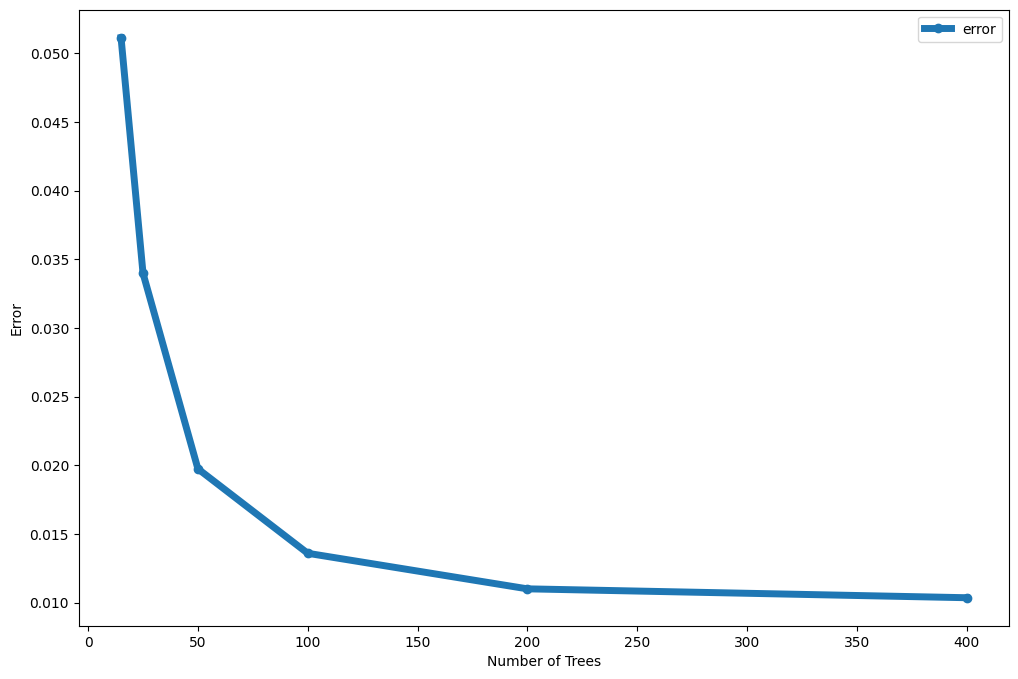

In [15]:
# creamos un plot con el dataframe anterior, en este caso describimos un scatterplot de tamaño 12x8
ax = error_df.plot(marker = 'o', figsize = (12, 8), linewidth = 5)

# establecemos las etiquetas de los ejes x e y
ax.set(xlabel = 'Number of Trees', ylabel = 'Error');

$ \ $

---

## ***Question $(4)$***

$ \ $

$(1)$ Using a grid search with cross-validation, fit a new gradient boosted classifier with:

* The same list of estimators as question 3.

* Also try varying the learning rates (0.1, 0.01, 0.001, 0.0001), 

* The subsampling value (1.0 or 0.5), 

* The number of maximum features (1, 2, 3, 4)

In [16]:
# describimos la lista del numero de arboles 
tree_list = [15, 25, 50, 100, 200, 400]

# Los parámetros a ajustar
param_grid = {'n_estimators': tree_list,
              'learning_rate': [0.1, 0.01, 0.001, 0.0001],
              'subsample': [1.0, 0.5],
              'max_features': [1, 2, 3, 4]}

# Inicializamos el clasificador de aumento de gradiente
GBC = GradientBoostingClassifier(random_state = 42)

# describimos el objeto GridSearchCV búsqueda de cuadrícula
GV_GBC = GridSearchCV(GBC,
                      param_grid = param_grid,
                      scoring = 'accuracy',
                      n_jobs = -1)

# entrenamos nuestro modelo
GV_GBC = GV_GBC.fit(X_train, y_train)

$ \ $

$(2)$   Examine the parameters of the best fit model.

In [17]:
GV_GBC.best_estimator_

GradientBoostingClassifier(max_features=4, n_estimators=400, random_state=42,
                           subsample=0.5)

$ \ $

$(3)$   Calculate relevant error metrics on this model and examine the confusion matrix.

In [18]:
# predecimos un conjunto de datos con la data de prueba X_test y el modelo entrenado GV_GBC
y_pred = GV_GBC.predict(X_test)

# calculamos el error entre y_pred, y_test
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       597
           1       0.97      0.97      0.97       560
           2       0.97      0.97      0.97       547
           3       1.00      1.00      1.00       539
           4       0.99      1.00      1.00       418
           5       1.00      0.98      0.99       429

    accuracy                           0.99      3090
   macro avg       0.99      0.99      0.99      3090
weighted avg       0.99      0.99      0.99      3090



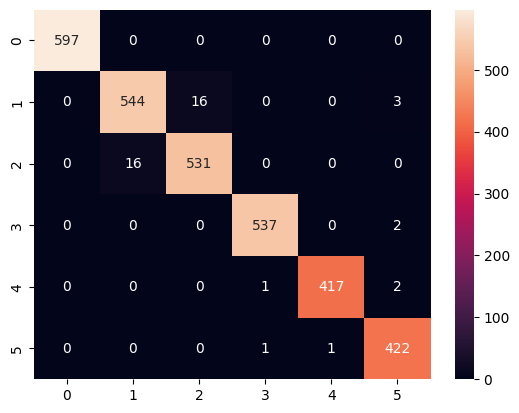

In [19]:
# creamos una matriz de confusion con la data y_pred, y_test
cm = confusion_matrix(y_test, y_pred)

# describimos un mapa de calor usando la matriz de confusion anterior
ax = sns.heatmap(cm, annot = True, fmt = 'd')

$ \ $

---

## ***Question $(5)$***

$ \ $

$(1)$  Create an AdaBoost model and fit it using grid search, much like question 4. Try a range of estimators between 100 and 200.

In [20]:
# creamos un arbol clasificador 
tree = DecisionTreeClassifier(max_depth = 1)

# Los parámetros a ajustar
param_grid = {'n_estimators': [100, 150, 200], 
              'learning_rate': [0.01, 0.001]}

# creamos un modelo AdaBoostClassifier tomando como parametro el arbol clasificador 
ABC = AdaBoostClassifier(tree)

# describimos el objeto GridSearchCV búsqueda de cuadrícula
GV_ABC = GridSearchCV(ABC,
                      param_grid = param_grid,
                      scoring = 'accuracy',
                      n_jobs = -1)

# entrenamos nuestro modelo
GV_ABC = GV_ABC.fit(X_train, y_train)

$ \ $

$(2)$ We describe the best model.

In [21]:
GV_ABC.best_estimator_

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=100)

$ \ $

$(3)$  Compare the errors from AdaBoost to those from the GradientBoostedClassifier.

In [22]:
# predecimos un conjunto de datos con la data de prueba
y_pred = GV_ABC.predict(X_test)

# usamos la funcion classification_report para describir el error del modelo creado anteriormente
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       598
           1       0.00      1.00      0.00         1
           2       1.00      0.49      0.66      1108
           3       0.92      0.84      0.88       589
           4       0.73      0.95      0.82       320
           5       0.89      0.80      0.84       474

    accuracy                           0.75      3090
   macro avg       0.76      0.85      0.70      3090
weighted avg       0.94      0.75      0.81      3090



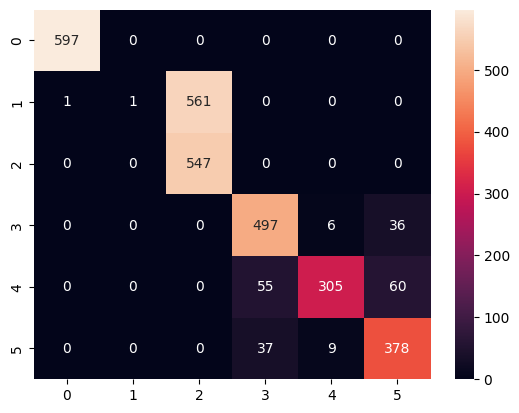

In [23]:
# creamos la matriz de confusion que describe la compara la data predecida y la data de prueba
cm = confusion_matrix(y_test, y_pred)

# creamos un mapa de calor con la matriz de confusion 
ax = sns.heatmap(cm, annot = True, fmt = 'd')

$ \ $

---

## ***Question $(6)$***

$ \ $

$(1)$ Fit a logistic regression model with regularization.

In [24]:
# creamos un modelo de regresion logistica con penalty = L2, max_iter = 500, solver = 'saga'
log_reg = LogisticRegression(penalty = 'l2', max_iter = 500, solver = 'saga')

# entrenamos el modelo de regresion logistica con la data de entrenamiento
LR_L2 = log_reg.fit(X_train, y_train)

$ \ $

$(2)$ Using `VotingClassifier`, fit the logistic regression model along with either the GratientBoostedClassifier or the AdaBoost model (or both) from questions 4 and 5.

In [25]:
# predecimos un conjunto de datos con el modelo LR_L2 y la data de prueba X_test
y_pred = LR_L2.predict(X_test)

# usamos la funcion classification_report para describir el error entre y_pred, y_test
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       598
           1       0.95      0.96      0.95       558
           2       0.95      0.95      0.95       547
           3       1.00      0.99      0.99       544
           4       0.98      1.00      0.99       413
           5       1.00      0.98      0.99       430

    accuracy                           0.98      3090
   macro avg       0.98      0.98      0.98      3090
weighted avg       0.98      0.98      0.98      3090



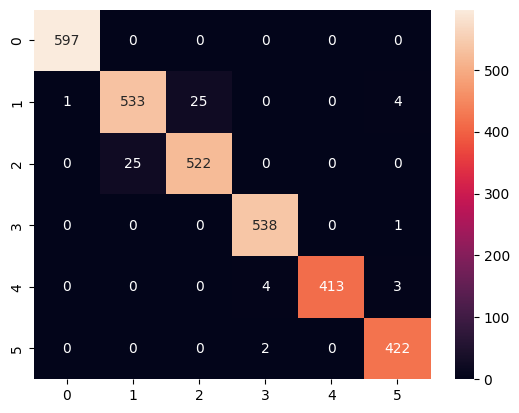

In [26]:
# creamos la matriz de confusion con la data y_test, y_pred
cm = confusion_matrix(y_test, y_pred)

# describimos un mapa de calor con la data y_test, y_pred
ax = sns.heatmap(cm, annot = True, fmt = 'd')

In [27]:
# El modelo combinado: regresión logística y árboles potenciados por gradiente
estimators = [('LR_L2', LR_L2), ('GBC', GV_GBC)]

# creamis el objeto VotingClassifier con los dos modelos anteriores
VC = VotingClassifier(estimators, voting = 'soft')

# entrenamos nuestro objeto creado con la data de prueba X_train, y_train
VC.fit(X_train, y_train)

VotingClassifier(estimators=[('LR_L2',
                              LogisticRegression(max_iter=500, solver='saga')),
                             ('GBC',
                              GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                                           n_jobs=-1,
                                           param_grid={'learning_rate': [0.1,
                                                                         0.01,
                                                                         0.001,
                                                                         0.0001],
                                                       'max_features': [1, 2, 3,
                                                                        4],
                                                       'n_estimators': [15, 25,
                                                                        50, 100,
                                                                        200,
                                                                        400],
                                                       'subsample': [1.0, 0.5]},
                                           scoring='accuracy'))],
                 voting='soft')

$ \ $

$(3)$ Determine the error as before and compare the results to the appropriate gradient boosted model(s).

In [28]:
# predecimos un conjunto de datos con nuestro nuevo modelo
y_pred = VC.predict(X_test)

# usamos la funcion classification_report para describir el error y_test, y_pred
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       597
           1       0.97      0.96      0.97       563
           2       0.97      0.97      0.97       547
           3       1.00      1.00      1.00       539
           4       1.00      0.99      1.00       420
           5       0.98      1.00      0.99       424

    accuracy                           0.99      3090
   macro avg       0.99      0.99      0.99      3090
weighted avg       0.99      0.99      0.99      3090



$ \ $

$(4)$ Plot the confusion matrix for the best model created in this set of exercises.

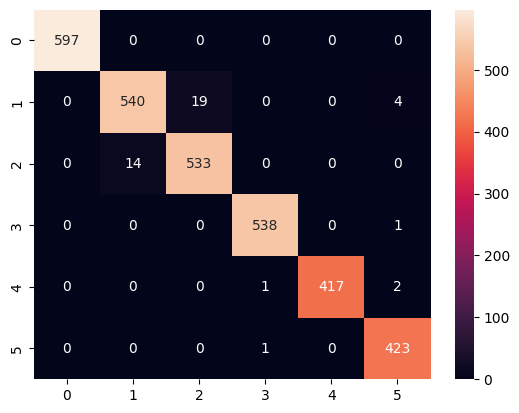

In [29]:
# creamos una matriz de confusion con la data y_test, y_pred
cm = confusion_matrix(y_test, y_pred)

# mostramos un mapa de calor con la matriz de confusion
ax = sns.heatmap(cm, annot = True, fmt = 'd')